In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

In [2]:
df = pd.read_csv('./assignments_from_pool_Quality.tsv', sep="\t")

In [3]:
df = df.drop(columns=['GOLDEN:ad', 'GOLDEN:not_ad', 'GOLDEN:ban_insult_hard', 'GOLDEN:ban_shock_content', 'GOLDEN:ban_shock_content',
'HINT:text', 'HINT:default_language'])


In [4]:
df = df.fillna(0)
def f(row):
    if row['OUTPUT:ad'] == 'yes':
        val = 'ad'
    elif row['OUTPUT:not_ad'] != 0:
        val = 'not_ad'
    elif row['OUTPUT:ban_insult_hard'] != 0:
        val = 'ban_insult_hard'
    elif row['OUTPUT:ban_shock_content'] != 0:
        val = 'ban_shock_content'    
    else:
        val = ' '
    return val

df['OUTPUT:label'] = df.apply(f, axis=1)



In [5]:
df.nunique ()
df.head()

,INPUT:label,INPUT:comment,INPUT:task-id,OUTPUT:ad,OUTPUT:not_ad,OUTPUT:ban_insult_hard,OUTPUT:ban_shock_content,ASSIGNMENT:worker_id,OUTPUT:label
0,ban_shock_content,Суд вынес приговор по громкому делу «черных ри...,323,no,True,0,0,15d552b5b026032afd7b3956fa0ad66b,not_ad
1,ad,Индивидуальные панели от livolotouch.ru. - Реа...,105,yes,0,0,0,15d552b5b026032afd7b3956fa0ad66b,ad
2,ad,Уютная атмосфера DailyKalyan. Спокойная музыка...,186,yes,0,0,0,15d552b5b026032afd7b3956fa0ad66b,ad
3,ad,Заточка инструмента. Дорогие соседи! Предлагае...,138,yes,0,0,0,15d552b5b026032afd7b3956fa0ad66b,ad
4,ad,Привет! мы помогаем Вам продавать на торговой ...,142,yes,0,0,0,15d552b5b026032afd7b3956fa0ad66b,ad


In [6]:
df = df.drop(columns=['OUTPUT:ad', 'OUTPUT:not_ad', 'OUTPUT:ban_insult_hard', 'OUTPUT:ban_shock_content'])

In [7]:
df.nunique ()

INPUT:label               4
INPUT:comment           500
INPUT:task-id           500
ASSIGNMENT:worker_id     63
OUTPUT:label              4
dtype: int64

In [8]:
#сохранения в tsv
df.to_csv('Quality.tsv', sep="\t", index=False)

In [9]:
df[df['INPUT:label'] == df['OUTPUT:label']].count()[0]

1201

In [10]:
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0]

443

In [11]:
# 29% неправильных ответов
df[df['INPUT:label'] != df['OUTPUT:label']].count()[0] / 1500

0.29533333333333334

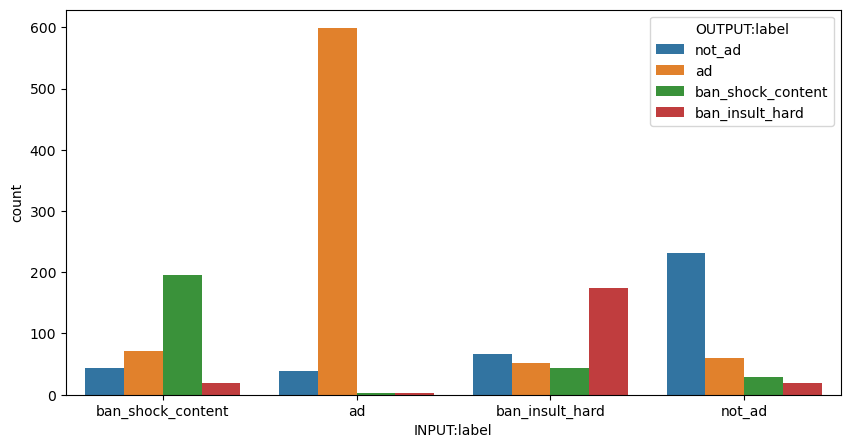

In [12]:
#При добавлении контроля качества процент ошибок снизился 29% (443), но по прежнему высок. Возможно, нужнжо уменьшить количество заданий на странице, и изменить инструкцию
# 
_, axes = plt.subplots(1, sharey=True, figsize=(10,5))


sns.countplot(x='INPUT:label', hue='OUTPUT:label', data=df);